In [1]:
# Import the necessary libraries
import os
import cv2  # OpenCV for image loading
import matplotlib.pyplot as plt
import random

print("Libraries imported successfully!")

Libraries imported successfully!


Found stages: ['2cell', '4cell', '8cell', 'blastocyst', 'morula']
Selected Stage: blastocyst
Selected Split: test
Attempting to load image: ../data/processed/blastocyst\test\00029.png
Image loaded successfully!
Image dimensions (Height, Width): (256, 256)


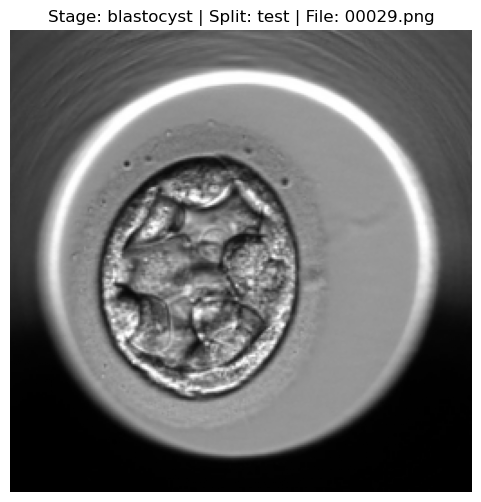

In [5]:
# --- Configuration ---
# Define the path to our processed data directory
DATA_DIR = '../data/processed/'

# --- NEW, CORRECTED LOGIC FOR PATH SELECTION ---

# 1. Get the list of stage directories (e.g., '2cell', '4cell')
stages = os.listdir(DATA_DIR)
print(f"Found stages: {stages}")

# 2. Pick a random stage
random_stage = random.choice(stages)
stage_path = os.path.join(DATA_DIR, random_stage)
print(f"Selected Stage: {random_stage}")

# 3. Define the splits and pick a random one
splits = ['train', 'test']
random_split = random.choice(splits)
split_path = os.path.join(stage_path, random_split)
print(f"Selected Split: {random_split}")

# 4. Now, list the image files inside the correct 'split' directory
try:
    # Filter for actual image files to avoid any other files/folders
    all_files_in_split = os.listdir(split_path)
    image_files = [f for f in all_files_in_split if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif'))]

    # 5. Check if we found any images before proceeding
    if not image_files:
        print(f"---")
        print(f"ERROR: No image files were found in the directory: {split_path}")
        print(f"Please ensure this folder exists and contains images.")
    else:
        # 6. Pick a random image from the list
        random_image_name = random.choice(image_files)

        # 7. Construct the final, full path to the image
        image_path = os.path.join(split_path, random_image_name)

        print(f"Attempting to load image: {image_path}")
        
        # --- Image Loading and Display (Same as before) ---
        
        # Load the image using OpenCV
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Check if the image was loaded correctly
        if image is not None:
            print(f"Image loaded successfully!")
            print(f"Image dimensions (Height, Width): {image.shape}")
            
            # Display the image using Matplotlib
            plt.figure(figsize=(6, 6)) # Make the plot a bit bigger
            plt.imshow(image, cmap='gray')
            plt.title(f"Stage: {random_stage} | Split: {random_split} | File: {random_image_name}")
            plt.axis('off')
            plt.show()
        else:
            print(f"---")
            print(f"ERROR: OpenCV could not load the image at path: {image_path}")
            print(f"The file may be corrupted or in an unsupported format.")

except FileNotFoundError:
    print(f"---")
    print(f"ERROR: The directory does not exist: {split_path}")
    print(f"Please check that the '{random_split}' folder exists inside the '{random_stage}' folder.")